In [27]:
from datetime import date
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [28]:
# Загрузка данных из Excel файла, содержащего статистику по задачам
data = pd.read_excel('Yougile_stats.xlsx')

# Функция для преобразования строки в дату
def str_to_date(s):
    d, m, y = s.split(' ')[0].split('.')
    return date(int(y), int(m), int(d))

# Функция для вычисления номера недели года
def week_no(d: date):
    return d.isocalendar().week

# Предобработка данных
data['Work (hours)'] = data['Work (hours)'].apply(float)  # Преобразуем название столбца в правильное
data['Completed At'] = data['Completed At'].apply(str_to_date)  # Преобразуем строки с датами в объект даты
data['week_no'] = data['Completed At'].apply(week_no)  # Добавляем столбец с номером недели, когда была выполнена задача
data

,Work (hours),ID,Task Title,Created At,Author,Assigned To / Manager,Deadline,Completed At,week_no
0,2.0,T1,Настройка страницы регистрации пользователя,10.10.2025 12:30,Маатук Джавхер,"Маатук Джавхер, Студент 2",15.10.2025 12:30,2025-10-14,42
1,1.5,T2,Настройка интерфейса метода оплаты,10.10.2025 13:00,Студент 2,"Студент 2, Студент 3",15.10.2025 14:00,2025-10-14,42
2,1.0,T3,Реализация функционала напоминаний о платеже,10.10.2025 14:30,Студент 3,"Студент 3, Студент 2",16.10.2025 16:00,2025-10-15,42
3,2.0,T4,Дизайн пользовательского интерфейса,11.10.2025 09:00,Студент 2,"Студент 2, Дизайнер",16.10.2025 18:00,2025-10-15,42
4,3.0,T5,Реализация функции уведомлений о платежах,11.10.2025 12:00,Студент 3,"Студент 3, Студент 2",17.10.2025 12:30,2025-10-16,42
5,1.5,T6,Интеграция базы данных с отслеживанием платежей,12.10.2025 08:00,Маатук Джавхер,"Маатук Джавхер, Студент 2",18.10.2025 10:30,2025-10-17,42
6,1.5,T7,Реализация функции истории платежей,12.10.2025 10:30,Студент 2,"Студент 2, Студент 3",18.10.2025 14:00,2025-10-17,42
7,1.0,T8,Реализация графика анализа финансов,12.10.2025 14:00,Студент 3,"Студент 3, Студент 2",19.10.2025 12:30,2025-10-18,42
8,1.0,T9,Добавление функции редактирования настроек пол...,13.10.2025 10:00,Студент 2,"Студент 2, Студент 3",19.10.2025 15:00,2025-10-18,42
9,0.5,T10,Настройка бэкенда для уведомлений о регулярных...,13.10.2025 15:30,Студент 3,"Студент 3, Студент 2",20.10.2025 11:00,2025-10-19,42


In [29]:
# Получаем распределение количества задач, выполненных по неделям
task_per_week = data.groupby(by='week_no').count()['ID'].to_numpy()

# Получаем суммарные трудозатраты за каждую неделю (количество часов работы за неделю)
hhour_per_week = data[['week_no', 'Work (hours)']].groupby(by='week_no').sum().to_numpy().ravel()

# Метод 1: Симуляция Монте-Карло на основе количества выполненных задач в неделю
# Количество итераций для симуляции
iter_count = 10000
tasks_count = 5     # Общее количество задач для завершения Фазы 5

weeks_result_mc1 = []

for i in range(iter_count):
    completed_tasks = 0
    weeks = 0
    while completed_tasks < tasks_count:
        weeks += 1
        completed_tasks += np.random.choice(task_per_week)  # Случайный выбор числа задач, выполненных за неделю
    weeks_result_mc1.append(weeks)

weeks_result_mc1 = np.array(weeks_result_mc1)
print(f"С 80-процентной достоверностью задачи будут выполнены за: {np.percentile(weeks_result_mc1, 80)} недель")

# Метод 2: Симуляция Монте-Карло на основе трудозатрат (с использованием треугольного распределения для задач)
# Определяем треугольные оценки для задач Фазы 5
tasks_triangulars = [
    [1, 2, 3],  # Задача 1: Регистрация пользователя
    [0.5, 1, 3],  # Задача 2: Добавление метода оплаты
    [0.5, 1, 2],  # Задача 3: Настройка напоминания
    [2, 3, 4],    # Задача 4: Интеграция с базой данных
    [2.5, 4, 6]   # Задача 5: Дизайн UI и интеграция
]

weeks_result_mc2 = []


С 80-процентной достоверностью задачи будут выполнены за: 1.0 недель


С 80-процентной достоверностью задачи будут выполнены за: 1.0 недель


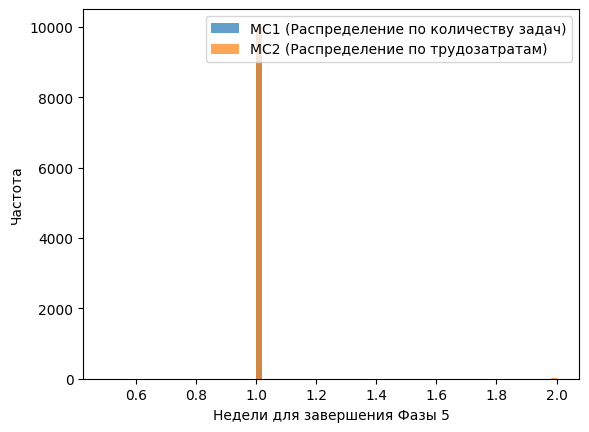

In [30]:
for i in range(iter_count):
    total_lc = np.sum([np.random.triangular(*tt) for tt in tasks_triangulars])  # Суммируем общие трудозатраты для всех задач
    completed_lc = 0
    weeks = 0
    while completed_lc < total_lc:
        weeks += 1
        completed_lc += np.random.choice(hhour_per_week)  # Случайный выбор доступных трудозатрат на каждую неделю

    weeks_result_mc2.append(weeks)

weeks_result_mc2 = np.array(weeks_result_mc2)
print(f"С 80-процентной достоверностью задачи будут выполнены за: {np.percentile(weeks_result_mc2, 80)} недель")

# По желанию, можно построить график распределений для визуализации
plt.hist(weeks_result_mc1, bins=50, alpha=0.7, label="MC1 (Распределение по количеству задач)")
plt.hist(weeks_result_mc2, bins=50, alpha=0.7, label="MC2 (Распределение по трудозатратам)")
plt.xlabel('Недели для завершения Фазы 5')
plt.ylabel('Частота')
plt.legend()
plt.show()